# The Three Body Problem

Beim Dreikörperproblem wird die Bewegung dreier (Himmels-) Körper unter Einfluss ihrer gegenseitigen Gravitationskraft betrachtet. Da dieses Problem nur für einige spezielle Konfigurationen der drei Körper analytisch lösbar ist, müssen die Bewegungsgleichungen in der Regel durch numerisches Integrieren gelöst werden. Dies soll hier über die Methode der Euler-Integration durchgeführt werden, wobei die Trajektorien entsprechend mit der dem Animationsmodul $\texttt{manim}$ dargestellt werden.

### Import der benötigten Module

Import der $\texttt{manim}$-Bibliothek und Speichern der Bild- und Videoparameter in `video_scene` und `image_scene`. Enthält außerdem die Parameter-Check Funktion, die später die verwendeten Parameter auf Validität bezüglich Arraygröße überprüft.

In [1]:
from manim import *
import jupyter_capture_output
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

video_scene = " -v WARNING --progress_bar None --disable_caching TBP_Scene"
image_scene = " -v WARNING --progress_bar None --disable_caching -r 427,240  -s TBP_Scene"

def param_check(framerate, run_time, sun_speed, i_steps):
    if run_time * framerate * sun_speed >= i_steps + 1:
        raise IndexError('Ihr Positionsarray enthält nicht genüged Einträge. Verändern sie die Parameter!')
    else:
        print(f'Parameter valide: Es werden {run_time * framerate * sun_speed} der {i_steps + 1} Einträge des Arrays genutzt.')

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.6


## Numerische (Euler-) Integration

Funktionen der numerischen Eulerintegration des Drei-Sonnen-Problems. Sämtliche Rechnungen werden bzw. können in drei Raumdimensionen durchgeführt werden, auch wenn die spätere Animation lediglich zweidimensional sein wird.

In [2]:
# Berechnung der Distanz zwischen ri und rj 
def r(xi, yi, zi, xj, yj, zj):
    return pow(pow(xi-xj, 2) + pow(yi-yj, 2) + pow(zi-zj, 2) + pow(0.5, 2), 0.5)


# Berechnung der Gravitationsbeschleunigung ausgeübt von mj auf mi 
def g(posi, posj, mj, r):
    G = 6.67259 * pow(10, -11)
    return G*(posj-posi)*mj/pow(r, 3)


# Berechnung der Massezentrumskoordinaten
def com(pos1, m1, pos2, m2, pos3, m3):
    return (pos1 * m1 + pos2 * m2 + pos3 * m3) / (m1 + m2 + m3)


# Numerische (Euler-) Integration
def thethreebodyproblem(m1, x1, y1, z1, v_x1, v_y1, v_z1, m2, x2, y2, z2, v_x2, v_y2, v_z2, m3, x3, y3, z3, v_x3, v_y3, v_z3, n, T):
    # Integrationsschrittweite
    dt = T / n
    
    # Initiale Massezentren
    cox = com(x1, m1, x2, m2, x3, m3)
    coy = com(y1, m1, y2, m2, y3, m3)
    coz = com(z1, m1, z2, m2, z3, m3)

    # Erstellen des (leeren) Positionsarrays und hinzufügen der initialen (Schwerpunkts-) Positionen
    TBP_pos = np.zeros((3, 3, n+1))

    TBP_pos[0, 0, 0] = x1 - cox
    TBP_pos[0, 1, 0] = y1 - coy
    TBP_pos[0, 2, 0] = z1 - coz

    TBP_pos[1, 0, 0] = x2 - cox
    TBP_pos[1, 1, 0] = y2 - coy
    TBP_pos[1, 2, 0] = z2 - coz

    TBP_pos[2, 0, 0] = x3 - cox
    TBP_pos[2, 1, 0] = y3 - coy
    TBP_pos[2, 2, 0] = z3 - coz

    for i in range(1, n+1):
        # Berechnung der Distanzen
        r12 = r(x1, y1, z1, x2, y2, z2)
        r23 = r(x2, y2, z2, x3, y3, z3)
        r31 = r(x3, y3, z3, x1, y1, z1)

        # Berechnung der aktuellen Gravitationsbeschleunigungen
        g_x1 = g(x1, x2, m2, r12) + g(x1, x3, m3, r31)
        g_y1 = g(y1, y2, m2, r12) + g(y1, y3, m3, r31)
        g_z1 = g(z1, z2, m2, r12) + g(z1, z3, m3, r31)

        g_x2 = g(x2, x3, m3, r23) + g(x2, x1, m1, r12)
        g_y2 = g(y2, y3, m3, r23) + g(y2, y1, m1, r12)
        g_z2 = g(z2, z3, m3, r23) + g(z2, z1, m1, r12)

        g_x3 = g(x3, x1, m1, r31) + g(x3, x2, m2, r23)
        g_y3 = g(y3, y1, m1, r31) + g(y3, y2, m2, r23)
        g_z3 = g(z3, z1, m1, r31) + g(z3, z2, m2, r23)

        # Aktualisieren der Geschwindigkeiten
        v_x1 += g_x1 * dt
        v_y1 += g_y1 * dt
        v_z1 += g_z1 * dt

        v_x2 += g_x2 * dt
        v_y2 += g_y2 * dt
        v_z2 += g_z2 * dt

        v_x3 += g_x3 * dt
        v_y3 += g_y3 * dt
        v_z3 += g_z3 * dt        

        # Aktualisieren der Positionen
        x1 += v_x1 * dt
        y1 += v_y1 * dt
        z1 += v_z1 * dt

        x2 += v_x2 * dt
        y2 += v_y2 * dt
        z2 += v_z2 * dt

        x3 += v_x3 * dt
        y3 += v_y3 * dt
        z3 += v_z3 * dt    

        # Aktualisieren der Massezentren
        cox = com(x1, m1, x2, m2, x3, m3)
        coy = com(y1, m1, y2, m2, y3, m3)
        coz = com(z1, m1, z2, m2, z3, m3)

        # Hinzufügen der aktualisierten Positionen zum Array
        TBP_pos[0, 0, i] = x1 - cox
        TBP_pos[0, 1 ,i] = y1 - coy
        TBP_pos[0, 2, i] = z1 - coz

        TBP_pos[1, 0, i] = x2 - cox
        TBP_pos[1, 1, i] = y2 - coy
        TBP_pos[1, 2, i] = z2 - coz

        TBP_pos[2, 0, i] = x3 - cox
        TBP_pos[2, 1, i] = y3 - coy
        TBP_pos[2, 2, i] = z3 - coz
        
    return TBP_pos

### Einstellen der Parameter der Eulerintegration

In der folgenden Code-Zelle sind die Paramter der Sonnen, also die Massen $m_i$, die Startpositionen $\{x_i, y_i, z_i\}$ und die -geschwindigkeiten $\{v_{x, i}, v_{y, i}, v_{z, i}\}$ definiert. Da die spätere Animation in 2 Raumdimensionen (es werden lediglich $x$ und $y$-Komponente verwendet) durchgeführt wird, empfielt es sich sämtliche $z$-Komponenten gleich $0$ zu setzen, letztendlich sind sie irrelevant.

Durch Nullsetzen einer der Massen kann das Problem auf ein Zweikörper-Problem reduziert werden (welches ebenfalls generell analytisch lösbar ist).

In [217]:
# Sonne 1
m1 = 2*pow(10, 5)

x1 = -np.cos(1/4*np.pi)*2
y1 = np.sin(1/4*np.pi)*2
z1 = 0

v_x1 = 0
v_y1 = -0.0005
v_z1 = 0

# Sonne 2
m2 = 2*pow(10, 5)

x2 = np.cos(1/4*np.pi)*2
y2 = np.sin(1/4*np.pi)*2
z2 = 0

v_x2 = -0.0005
v_y2 = 0
v_z2 = 0

# Sonne 3
m3 = 2*pow(10, 5)

x3 = 0
y3 = -2
z3 = 0

v_x3 = 0.0005
v_y3 = 0
v_z3 = 0

### Einstellen der Integrationsparameter

Festlegen der Integrationsparameter `i_steps` für die Schrittweite und `T` für den Gesamtzeitraum. Aufruf der obigen Integrationsfunktion mit den zuvor definierten Parametern. Der Rückgabe ist das in der Variable `TBP` gespeicherte Array und enthält die Postitionen (in Schwerpunktskoordinaten) der 3 Sonnen über jeden der Integrationsschritte. Die erste Dimensionen ist die jeweilige Sonne $\{1, 2, 3\}$, die zweite Dimension sind die Koordinaten $\{x, y, z\}$, während die innerste Dimension des Arrays über sämtliche Integrationsschritte `n_steps` von $t=0$ bis $t=T$ (inklusive Start- und Endposition) verläuft. 

Die Arrays $r_i$ enthalten folglich für jede Sonne jeweils die Positionsinformationen (zweite Dimension des Arrays) über die drei Raumdimensionen (äußere Dimension des Arrays).

In [218]:
# Integrationsparameter
i_steps = 6000
T = 200000

# Aufruf Hauptintegrationsfunktion mit obigen Parametern und Speichern des Rückgabearrays
TBP = thethreebodyproblem(m1, x1, y1, z1, v_x1, v_y1, v_z1, m2, x2, y2, z2, v_x2, v_y2, v_z2, m3, x3, y3, z3, v_x3, v_y3, v_z3, i_steps, T)

r1 = TBP[0]
r2 = TBP[1]
r3 = TBP[2]

### Einstellen und Prüfen der Animationsparameter

Die Animation überstreicht in einer Sekunde `framerate` $\times$ `sun_speed` Arrayeinträge, folglich muss die Ungleichung $$\mathrm{run\_time}\times\mathrm{framerate}\times\mathrm{sun\_speed}\overset{!}{\leq}\mathrm{i\_steps}-1$$erfüllt sein damit die Animation über die Vollständigkeit der Animationsdauer `run_time` vollständig rendert. Der Parameter-Check prüft entsprechend das Array auf Vollständigkeit bezüglich der Ungleichung. Mit `rays` und `tail` können jeweils Sonnenstrahlen und der Schweif der Trajektorie ein- oder ausgeschaltet werden, die `fade_length` gibt dabei die Länge des Schweifes hinter der Sonne an.

In [227]:
# Animationsparameter
framerate = 60
run_time = 30
sun_speed = 1
fade_lenght = 50

rays = True
tail = True

param_check(framerate, run_time, sun_speed, i_steps)

Parameter valide: Es werden 1800 der 6001 Einträge des Arrays genutzt.


## Matplotlib-Vorschau der Trajektorien in 2D/3D

Die folgende Jupyter-Zelle bietet die Möglichkeit einer Vorschau der drei Sonnen-Trajektorien in 2D, dargestellt mit $\texttt{Matplotlib}$. Dies erspart einem unter Umständen das zeitintensive Rendern ungeeigneter Parameter. Mit den obigen Animationsparametern wird der durchgängige Teil der geplotteten Trajektorie in der Animation dargestellt werden, der transparentere, gestrichelte Part jedoch nicht. Der Animationsframe befindet sich in dem eingezeichneten Rechteck, die Proportionen weichen unter Umständen ab.

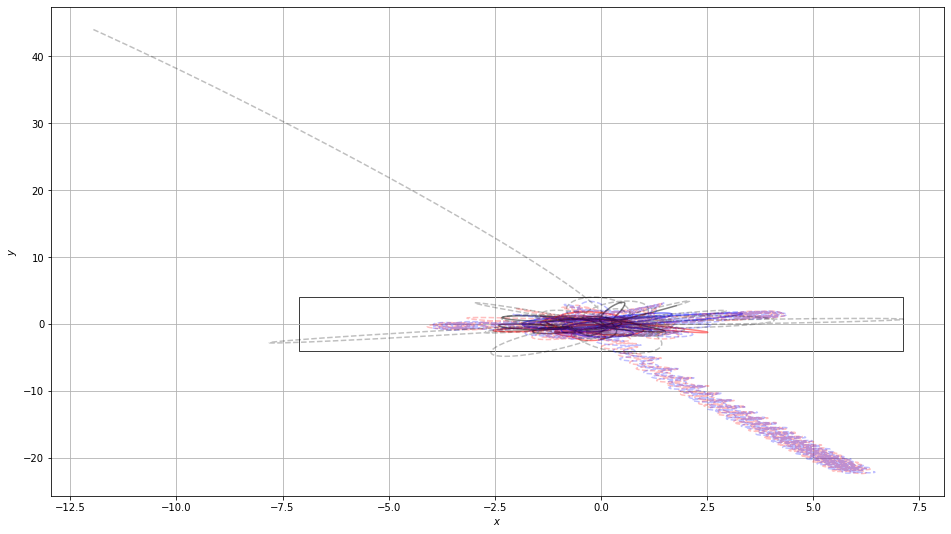

In [226]:
fig, ax = plt.subplots(figsize = (16,9))
used_frames = framerate * run_time * sun_speed

ax.plot(r1[0,:used_frames], r1[1,:used_frames], color = 'red', alpha = 0.5)
ax.plot(r2[0,:used_frames], r2[1,:used_frames], color = 'blue', alpha = 0.5)
ax.plot(r3[0,:used_frames], r3[1,:used_frames], color = 'black', alpha = 0.5)

ax.plot(r1[0,used_frames:], r1[1,used_frames:], color = 'red', alpha = 0.25, linestyle = '--')
ax.plot(r2[0,used_frames:], r2[1,used_frames:], color = 'blue', alpha = 0.25, linestyle = '--')
ax.plot(r3[0,used_frames:], r3[1,used_frames:], color = 'black', alpha = 0.25, linestyle = '--')

ax.add_patch(Rectangle((-7.111, -4), 14.222, 8, edgecolor = 'black', facecolor = 'none', lw = 0.75))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.grid()
plt.savefig('../TBP_extra/TBP_preview_L.png', facecolor = 'white', bbox_inches='tight')
plt.show()

Auch wenn die Animation lediglich zwei Raumdimensionen umfasst, bietet die folgende Jupyter-Zelle für Interessierte die Möglichkeit einer 3D-Darstellung. 

In [176]:
# Möglichkeit zur Darstellung der Trajektorien in 3 Raumdimensionen
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (9, 9))

# ax.plot(r1[0], r1[1], r1[2], color = 'red', alpha = 0.5)
# ax.plot(r2[0], r2[1], r2[2], color = 'blue', alpha = 0.5)
# ax.plot(r3[0], r3[1], r3[2], color = 'black', alpha = 0.5)

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_zlabel('$z$')

# plt.grid()
# plt.show()

## Animationen mit Manim

### Einleitende Textzeilen

In [40]:
%%capture_video --path "../TBP_extra/TBP_Introduction.mp4"
%%manim -ql --fps 60 $video_scene

# Einleitungstext
class TBP_Scene(Scene):
    def construct(self):
        text_list = ['Hi', 'Gut in der Schweiz angekommen?', 'hab noch ein Video xD', 'muss aber nochmal mehr\nStartbedingungen druchprobieren', 'noch nie unterschieliche\nMassen probiert', ';)']

        t_pol = []
        t_pol.append(Text(text_list[0], color = BLUE).shift(UP))
        for i in range(1, len(text_list)-1):
            if i % 2 == 1:
                t_pol.append(Text(text_list[i], color = WHITE).shift(DOWN))
            else:
                t_pol.append(Text(text_list[i], color = BLUE).shift(DOWN))
        t_pol.append(Text(text_list[i+1], color = RED))
        print(t_pol)
        self.play(Write(t_pol[0]), run_time = 2)
        for i in range(1, len(t_pol)-1):
            self.play(Write(t_pol[i]), run_time=2)
            self.play(FadeOut(t_pol[i-1]), ApplyMethod(t_pol[i].shift, 2*UP), run_time=2)
        self.play(ReplacementTransform(t_pol[len(t_pol)-2], t_pol[len(t_pol)-1]), run_time=2)
        self.wait(2)

[Text('Hi'), Text('Gut in der Schweiz angekommen?'), Text('hab noch ein Video xD'), Text('muss aber nochmal mehr\nStartbedingungen druchprobieren'), Text('noch nie unterschieliche\nMassen probiert'), Text(';)')]


### Startanimationen der Sonnen

Die Startanimation lässt die Sonnen erscheinen, fügt gegebenenfalls ihre Strahlen hinzu und bewegt die Sonnen anschließend in ihre Startposition.

In [235]:
%%capture_video --path "../TBP_extra/TBP_StartingAnimation.mp4"
%%manim -ql --fps 60 $video_scene

# Startanimation
class TBP_Scene(Scene):
    def construct(self):
        timeline = ValueTracker(0)

        # Kreieren der 3 Sonnen
        sun1 = VGroup(Circle(color = WHITE, radius = 0.1, fill_color = WHITE, fill_opacity = 0.5)).shift(2*LEFT)
        sun2 = VGroup(Circle(color = RED, radius = 0.1, fill_color = RED, fill_opacity = 0.5))
        sun3 = VGroup(Circle(color = YELLOW, radius = 0.1, fill_color = YELLOW, fill_opacity = 0.5)).shift(2*RIGHT)

        # Überschrift
        head = Text('Numerical Solution of the Three-Body-Problem', color = WHITE).to_edge(UP).scale(0.8)
        foot = Text('displayed in manim using center-of-mass coordinates', color = BLUE).to_edge(DOWN). scale(0.5)
        self.play(Write(head), run_time = 2)
        self.wait(0.5)
        self.play(ReplacementTransform(head, VGroup(sun1, sun2, sun3)), run_time = 2)
        self.wait(0.5)

        # Hizufügen der Strahlen (optional)
        if rays:
            for i in range(16):
                sb1e = Line().rotate(2*PI/16*i).scale(0.15).shift(2*LEFT).get_end()
                s1e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).shift(2*LEFT).get_end()
                sun1_ray = DashedLine(sb1e, s1e, color = WHITE, dash_length=0.005)
                sun1.add(sun1_ray)
                self.add(sun1_ray)
                self.wait(0.075)

            for i in range(16):
                sb2e = Line().rotate(2*PI/16*i).scale(0.15).get_end()
                s2e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).get_end()
                sun2_ray = DashedLine(sb2e, s2e, color = RED, dash_length=0.005)
                sun2.add(sun2_ray)
                self.add(sun2_ray)
                self.wait(0.075)

            for i in range(16):
                sb3e = Line().rotate(2*PI/16*i).scale(0.15).shift(2*RIGHT).get_end()
                s3e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).shift(2*RIGHT).get_end()
                sun3_ray = DashedLine(sb3e, s3e, color = YELLOW, dash_length=0.005)
                sun3.add(sun3_ray) 
                self.add(sun3_ray)
                self.wait(0.075)

        # Positionier-Animationen der Sonnen
        self.play(sun1.animate.shift(r1[:,0] + 2*RIGHT), sun2.animate.shift(r2[:,0]), sun3.animate.shift(r3[:,0] + 2*LEFT), run_time = 1.5)

        #self.play(ReplacementTransform(head, foot))
        self.wait(1)

### Hauptanimation der Trajektorie

Als Richtwert: Das Rendern für `20 s` Video in `60 fps` dauert ungefähr vier Minuten, ohne Strahlen kann die Renderzeit auf ca. eine Minute reduziert werden, ohne Schweif und Strahlen liegt sie unter zehn Sekunden. 

Während an der Länge der Animation natürlich gespart werden kann, sind `60 fps` stark zu empfehlen, da das Positionsarray pro Frame aufgerufen wird und ansonsten die Geschwindigkeit der Sonnen $v_S$ in der Animation leidet. Insgesamt ist die Sonnengeschwindigkeit proportional zu folgenden Parametern und kann entsprechend angepasst werden: $$\begin{align*}v_S\propto&~\mathrm{framerate}\\v_S\propto&~\mathrm{sun\_speed}\\v_S\propto&~\mathrm{T}\\v_S\propto&~\mathrm{i\_steps}^{-1}\end{align*}$$

Render und Enjoy. 

In [228]:
%%capture_video --path "../TBP_extra/TBP_MainAnimation_L2.mp4"
%%manim -ql --fps {framerate} $video_scene

class TBP_Scene(Scene):
    def construct(self):
        timeline = ValueTracker(0)

        # Kreieren der 3 Sonnen
        sun1 = VGroup(Circle(color = WHITE, radius = 0.1, fill_color = WHITE, fill_opacity = 0.5))
        sun2 = VGroup(Circle(color = RED, radius = 0.1, fill_color = RED, fill_opacity = 0.5))
        sun3 = VGroup(Circle(color = YELLOW, radius = 0.1, fill_color = YELLOW, fill_opacity = 0.5))

        # Positionsiteratoren der 3 Sonnen
        sun1.iter = iter(r1.T[::sun_speed,])
        sun2.iter = iter(r2.T[::sun_speed,])
        sun3.iter = iter(r3.T[::sun_speed,])

        # Updater der Sonnenpositionen
        def sun_updater(sun):
            sun.move_to(next(sun.iter))

        # Schweif-Updater
        def dot1_fadeout_updater(dot1):
            if dot1.counter != fade_lenght and dot1.counter != 1:
                dot1.fill_opacity -= 1/fade_lenght
                dot1.set_opacity(dot1.fill_opacity)
                dot1.counter -= 1                
            elif dot1.counter == fade_lenght:
                dot1.move_to(sun1.get_center())
                dot1.fill_opacity = 1
                dot1.set_opacity(dot1.fill_opacity)
                dot1.counter -= 1
            else:
                dot1.counter = fade_lenght
                dot1.fill_opacity = 1

        def dot2_fadeout_updater(dot2):
            if dot2.counter != fade_lenght and dot2.counter != 1:
                dot2.fill_opacity -= 1/fade_lenght
                dot2.set_opacity(dot2.fill_opacity)
                dot2.counter -= 1                
            elif dot2.counter == fade_lenght:
                dot2.move_to(sun2.get_center())
                dot2.fill_opacity = 1
                dot2.set_opacity(dot2.fill_opacity)
                dot2.counter -= 1
            else:
                dot2.counter = fade_lenght
                dot2.fill_opacity = 1           

        def dot3_fadeout_updater(dot3):
            if dot3.counter != fade_lenght and dot3.counter != 1:
                dot3.fill_opacity -= 1/fade_lenght
                dot3.set_opacity(dot3.fill_opacity)
                dot3.counter -= 1
            elif dot3.counter == fade_lenght:
                dot3.move_to(sun3.get_center())
                dot3.fill_opacity = 1
                dot3.set_opacity(dot3.fill_opacity)
                dot3.counter -= 1
            else:
                dot3.counter = fade_lenght
                dot3.fill_opacity = 1

        # Hinzufügen der Schweife
        if tail:
            for i in range(fade_lenght):
                dot1 = Dot(radius = 0.05, fill_color = WHITE, fill_opacity = 0.5)
                dot1.counter = fade_lenght + i
                dot1.fill_opacity = 0
                dot1.set_opacity(dot1.fill_opacity)
                self.add(dot1)
                dot1.add_updater(dot1_fadeout_updater)

                dot2 = Dot(radius = 0.05, fill_color = RED, fill_opacity = 0.5)
                dot2.counter = fade_lenght + i
                dot2.fill_opacity = 0
                dot2.set_opacity(dot2.fill_opacity)
                self.add(dot2)
                dot2.add_updater(dot2_fadeout_updater)

                dot3 = Dot(radius = 0.05, fill_color = YELLOW, fill_opacity = 0.5)
                dot3.counter = fade_lenght + i
                dot3.fill_opacity = 0
                dot3.set_opacity(dot3.fill_opacity)
                self.add(dot3)
                dot3.add_updater(dot3_fadeout_updater)

        # Hizufügen der Strahlen (optional)
        if rays:
            for i in range(16):
                se = Line(color = RED).rotate(2*PI/16*i).scale(0.15).get_end()
                s1e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).get_end()
                s2e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).get_end()
                s3e = Line().rotate(2*PI/16*i).scale(np.random.uniform(0.3, 0.6)).get_end()
                sun1_ray = DashedLine(se, s1e, color = WHITE, dash_length=0.005)
                sun2_ray = DashedLine(se, s2e, color = RED, dash_length=0.005)
                sun3_ray = DashedLine(se, s3e, color = YELLOW, dash_length=0.005)
                sun1.add(sun1_ray)
                sun2.add(sun2_ray)
                sun3.add(sun3_ray)

        # Hinzufügen der Sonnen
        self.add(sun1, sun2, sun3)

        sun1.move_to(r1[:,0])
        sun2.move_to(r2[:,0])
        sun3.move_to(r3[:,0])
        
        # Hinzufügen der Updater
        sun1.add_updater(sun_updater)
        sun2.add_updater(sun_updater)
        sun3.add_updater(sun_updater)

        # Timeline als ValueTracker
        self.play(timeline.animate.set_value(5), rate_func= linear, run_time = run_time)

<!-- ## Import der Module

Import der benötigten Module manim und numpy. Ebenfalls $\texttt{TBP\_array}$, das Array der numerischen Integration der Bewegungsgleichungen der 3 Sonnen, sowie $\texttt{free()}$ für die Wiederfreigabe des Arrays auf dem Arbeitsspeicher, nach dem Kopieren auf $\texttt{TBP}$. Das usprüngliche Array befand sich auf dem Arbeitsspeicher an der zurückgegenenen Position, dabei sollte die freigegebene Adresse der Rückgabeadresse entsprechen.  -->


<!-- ```c
double r(double xi, double yi, double zi, double xj, double yj, double zj) {
    return pow(pow(xi-xj, 2) + pow(yi-yj, 2) + pow(zi-zj, 2), 0.5);
}
``` -->